<div class = "alert alert-block alert-info">
    
## DATA 601 - FALL 2025
### HOMEWORK 6
### NAME: LAURA HAHN
### DATE: 12/8/2025

</div>

# Question 1 (5 Points)
Load dataset use exploratory data analysis functions we discussed in class as you see fit but make sure to explore the target feature.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar
import seaborn as sns
from scipy import stats as st

# scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df_heart = pd.read_csv('./input_data/heart.csv') #Loading dataset

In [3]:
df_heart.shape #Assessing columns and rows

(303, 14)

In [4]:
df_heart.info()
#There are no null values in the dataset
#Datatype is predominately integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df_heart.describe().T
#Target column represents a discrete variable - the presence of heart disease: '0' = no heart disease, '1' = heart disease present
#The target data is balanced, about 50/50
#Several columns represent categorical data: sex, cp, fbs, restecg, exang, slope, ca, thal

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'oldpeak'}>, <Axes: >]], dtype=object)

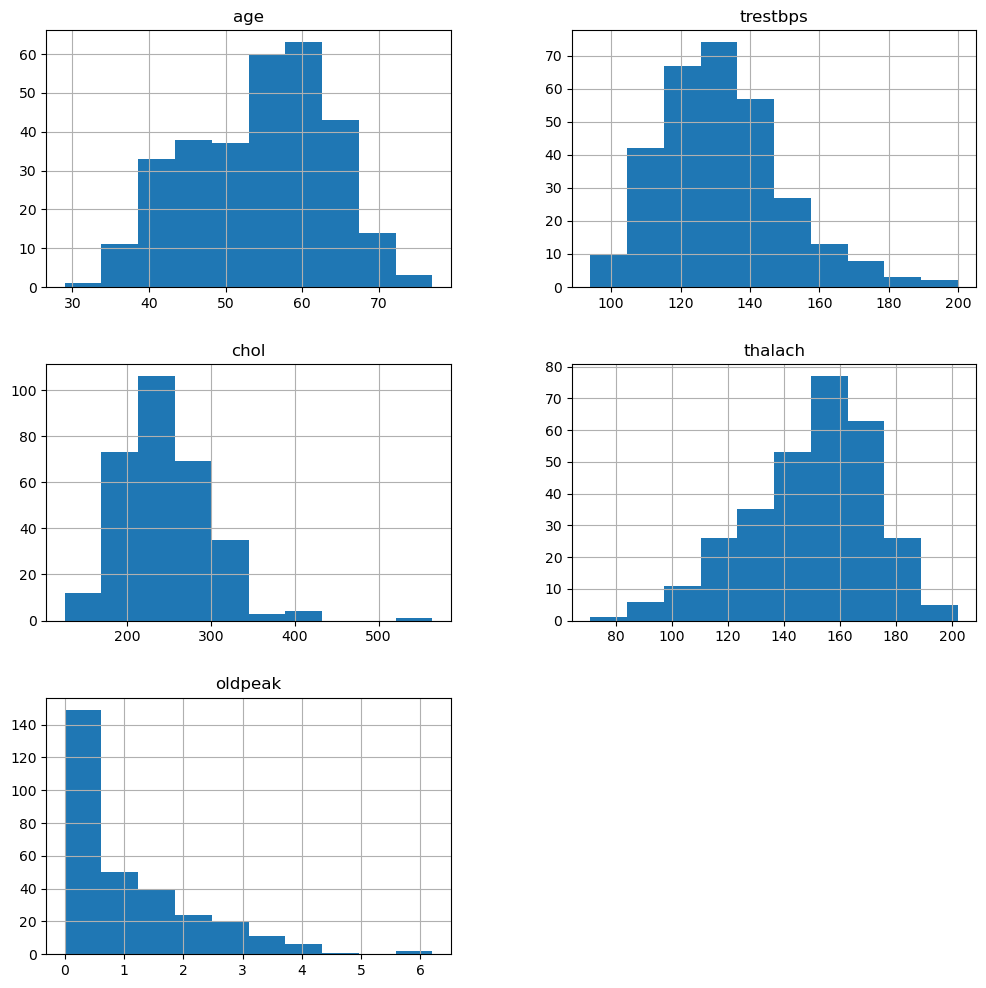

In [7]:
df_heart.hist(column = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], figsize = [12,12])
#Exploring distribution of continuous variables
#Most patients are > 40 years old
#Most have high cholesterol (total chol > 200), hypertension (resting BP > 120)

array([[<Axes: title={'center': 'sex'}>, <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'fbs'}>],
       [<Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'slope'}>],
       [<Axes: title={'center': 'ca'}>, <Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

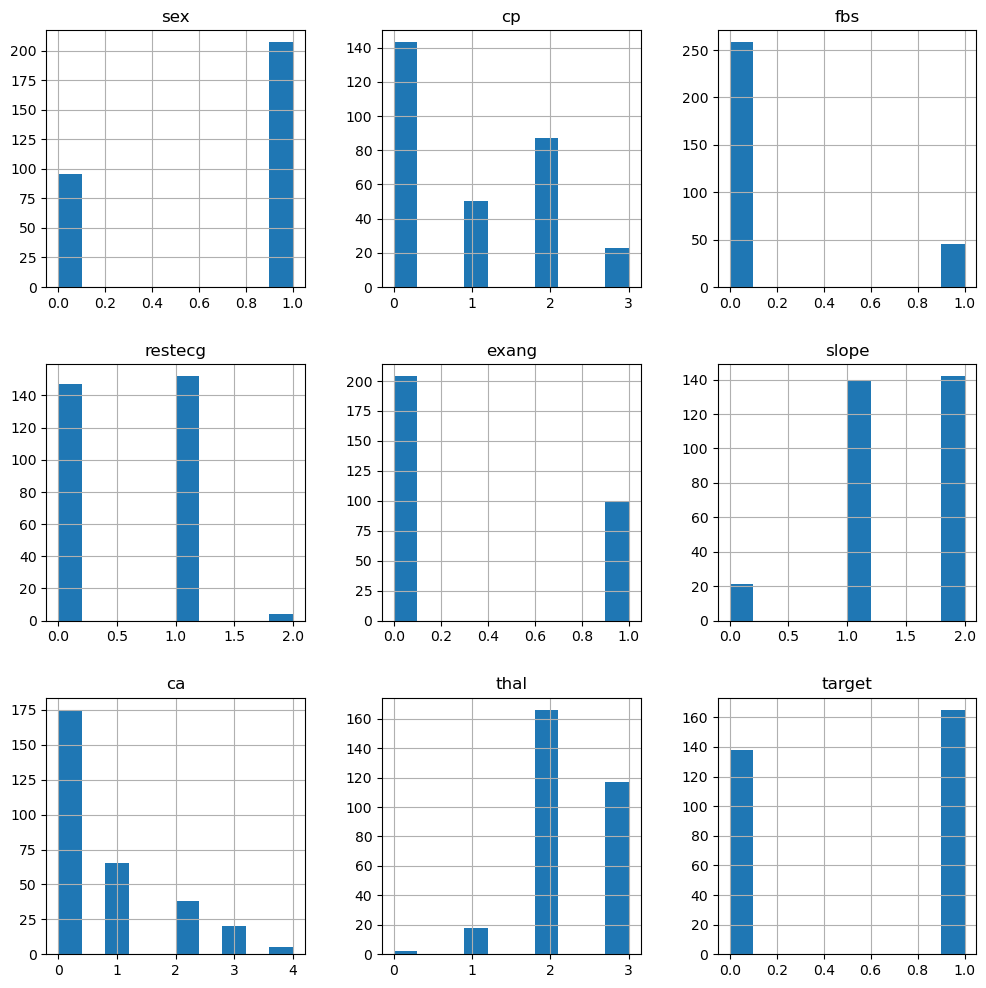

In [8]:
df_heart.hist(column = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'], figsize = [12, 12])
#Exploring distribution of discrete variables
#Predominately male patients, most with fasting glucose < 120 (non-diabetic)
#My assumption is that subjective data (like chest pain type, and exercise-induced angina) may not be good predictors for the presence of heart disease
#I also think there is likely bias introduced with the 'ca' variable because this is derived from fluoroscopy during cardiac catheterization
#Presumably, only those with abnormal stress tests underwent cardiac catheterization

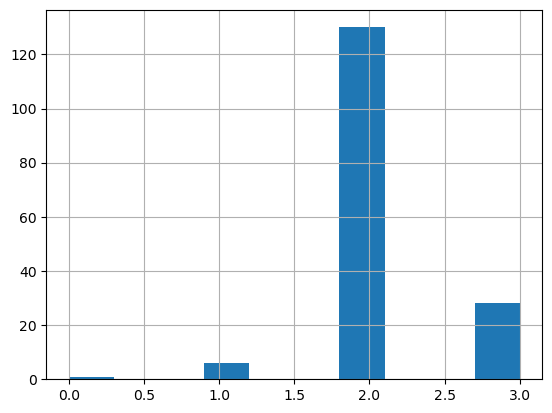

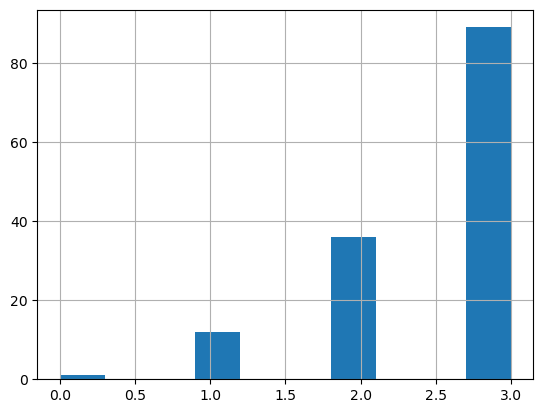

In [9]:
df_heart.loc[df_heart['target']==1,'thal'].hist()
plt.show()
df_heart.loc[df_heart['target']==0,'thal'].hist()
plt.show()
#There appears to be an association between reversible defect on stress test (thal = '2') and heart disease

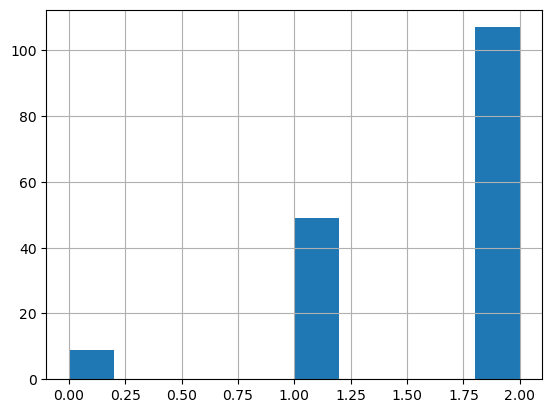

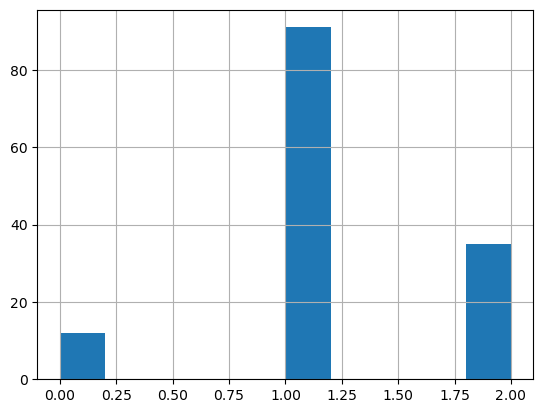

In [10]:
df_heart.loc[df_heart['target']==1,'slope'].hist()
plt.show()
df_heart.loc[df_heart['target']==0,'slope'].hist()
plt.show()
#There appears to be an association between downsloping ST segment on exercise stress test (slope = '2') and heart disease

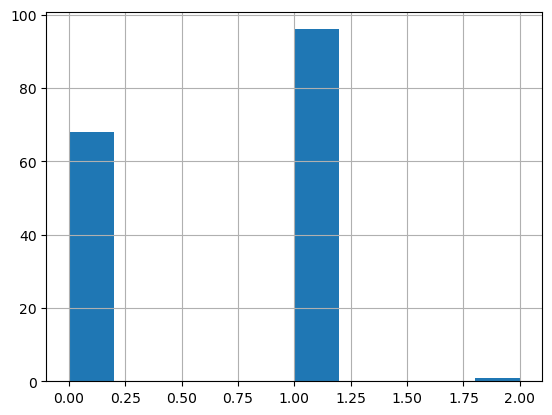

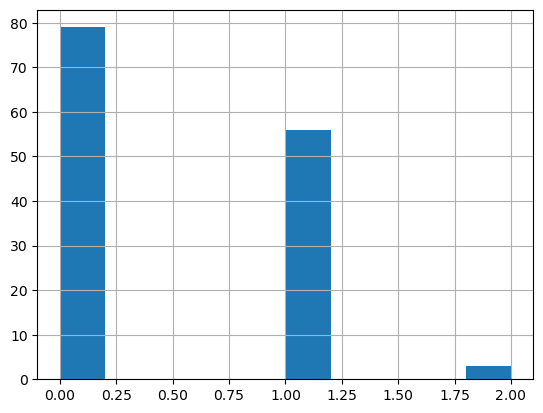

In [11]:
df_heart.loc[df_heart['target']==1,'restecg'].hist()
plt.show()
df_heart.loc[df_heart['target']==0,'restecg'].hist()
plt.show()
#There appears to be a less prominent association between abnormal resting ECG (restecg = '1') and heart disease

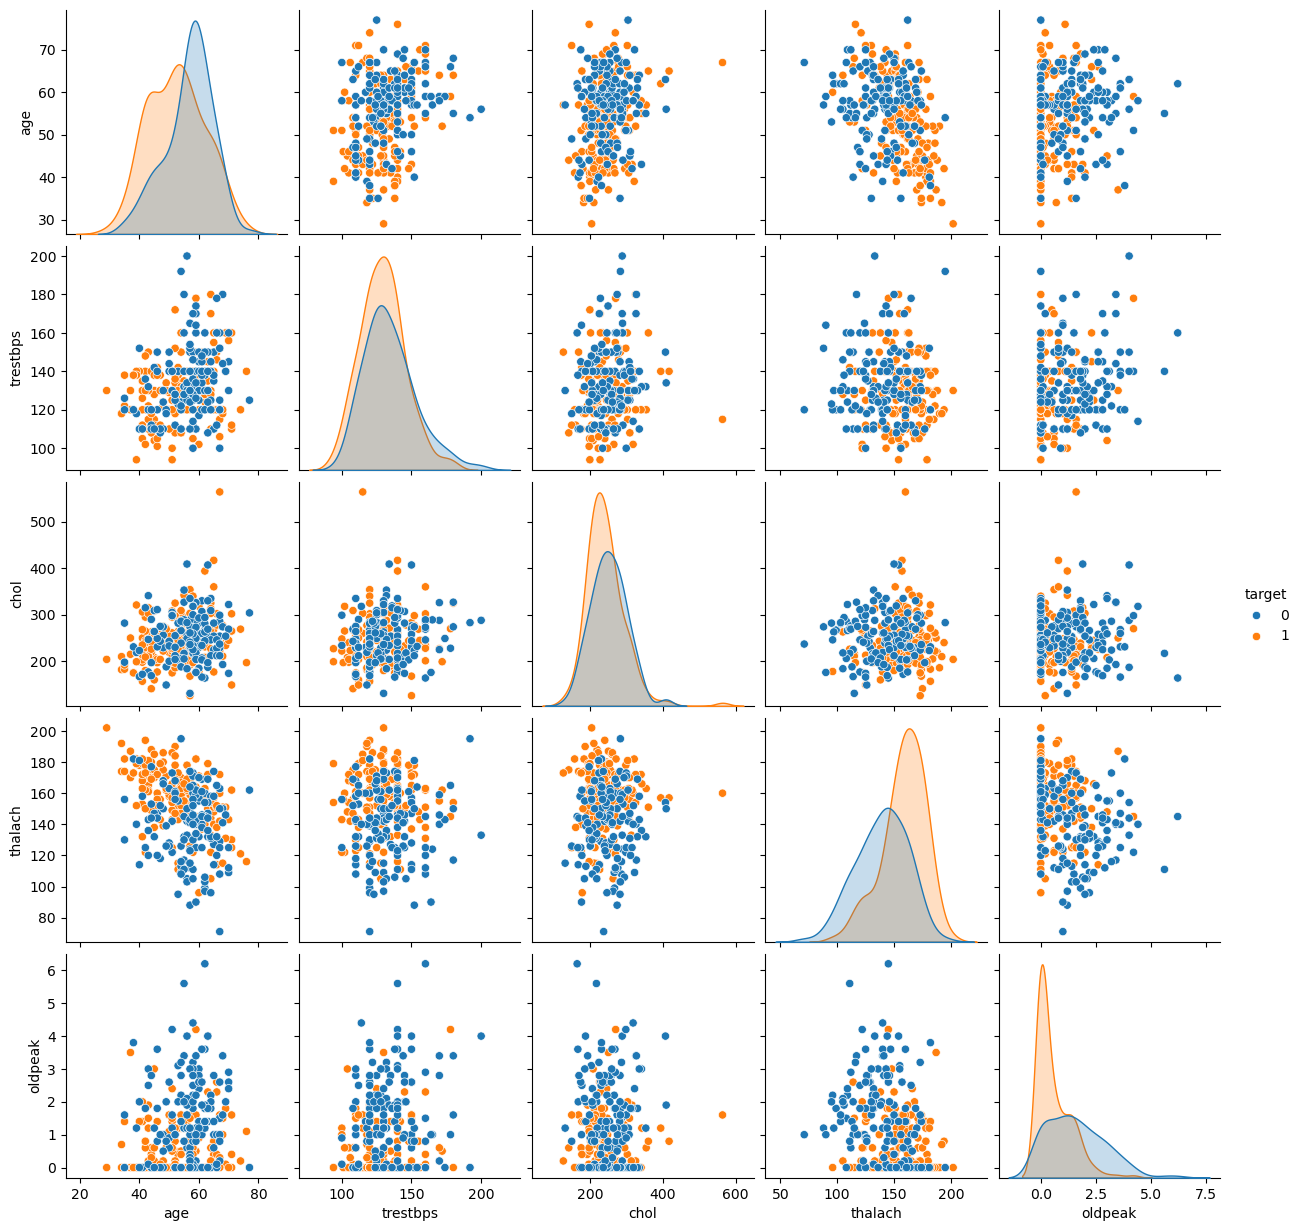

In [12]:
sns.pairplot(data= df_heart, vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], hue = 'target')
#Of the continuous variables, there is a positive association between HR achieved on stress test and heart disease
#There appears the be a negative association between mm of ST depression ('oldpeak') and heart disease

# Question 2 (5 Points)
Split the data into training (80%) and testing (20%).

In [13]:
#Defining independent and dependent variables
#Including independent variables that I think are most likely to predict heart disease in this dataset
x = df_heart.loc[:, ['age', 'sex', 'oldpeak', 'slope', 'restecg', 'thal', 'thalach']].values
y = df_heart.loc[:, 'target'].values

In [14]:
#Splitting data into testing/training
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Question 3 (10 Points)
Use SVM algorithm to predict the class and calculate metrics: Confustion Matrix, Accuracy, Sensitivity and Specificity.

In [15]:
#Defining model
clf = svm.SVC()
#Fitting training data to model
clf.fit(X_train, y_train)
#Getting predicted y values based on test data
y_predict = clf.predict(X_test)

In [16]:
#Calculating confusion matrix
cm1 = confusion_matrix(y_test, y_predict)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[15 15]
 [ 7 24]]


In [17]:
#Calculating accuracy
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

Accuracy :  0.639344262295082


In [18]:
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

Sensitivity :  0.5


In [19]:
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Specificity :  0.7741935483870968


# Question 4 (10 Points)
Use a random forest classifier to predict the class and calculate metrics: Confustion Matrix, Accuracy, Sensitivity and Specificity.

In [20]:
#Defining model
clf2 = RandomForestClassifier(max_depth=2, random_state=0)
#Fitting training data to model
clf2.fit(X_train, y_train)
#Getting predicted y values based on test data
y_predict = clf2.predict(X_test)

In [21]:
cm2 = confusion_matrix(y_test, y_predict)
print('Confusion Matrix : \n', cm2)

Confusion Matrix : 
 [[19 11]
 [ 6 25]]


In [22]:
total2=sum(sum(cm2))
accuracy2 = (cm2[0,0] + cm2[1,1]) / total2
print ('Accuracy : ', accuracy2)

Accuracy :  0.7213114754098361


In [23]:
sensitivity2 = cm2[0,0] / (cm2[0,0] + cm2[0,1])
print('Sensitivity : ', sensitivity2)

Sensitivity :  0.6333333333333333


In [24]:
specificity2 = cm2[1,1] / (cm2[1,0] + cm2[1,1])
print('Specificity : ', specificity2)

Specificity :  0.8064516129032258


# Question 5 (10 Points)
How many datapoints do we have in this dataset? Provide thoughts and comments on the size of this dataset on at least two of the following:  
- Which of the classification models above performed better?
- What are some challenges of the size of this dataset?
- Would you feel comfortable with using this dataset for predictions?
- What could be some things that you could do for improving the outputs and performance of the models? This could include steps during the data collection, cleaning/preparation/transformation, testing, training steps and/or model deployment.

### Answers:
1. The Random Forset Classifier performed better on this dataset
2. The sample size (303) is relatively small for the number of features included and the need to split the data for training/testing the model
3. The sensitivity is low using both classifiers, so I would not be comfortable using this for predictions of heart disease
4. I could improve the output possibly by removing outliers, scaling the data and/or selecting the optimal 'hyperparameters' of each classifier. I don't think cross-validation could be used because the sample size is too small. 

# Question 6 (15 Points)

We have the toy dataset "diamonds" loaded from SNS. The dataset is related to diamond characteristics. Please comment on the following questions. 
1. Comment on which features could we predict and which features could be potentially used for training?
2. What could be an appropriate model to use?
3. Using the sns.pairplot function, visually identify potential features where a linear regression model could be used to predict.
4. Use the linear regression model to predict one of the features.
5. Comment on the applicability of the linear regression. What could be done to improve the modeling and prediction?

In [25]:
diamonds = sns.load_dataset("diamonds")
diamonds.shape
#Large dataset with 53940 rows

(53940, 10)

In [26]:
diamonds.info()
#No null values
#Datatype "category" for cut, color, clarity

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [27]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [28]:
diamonds.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [29]:
diamonds.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

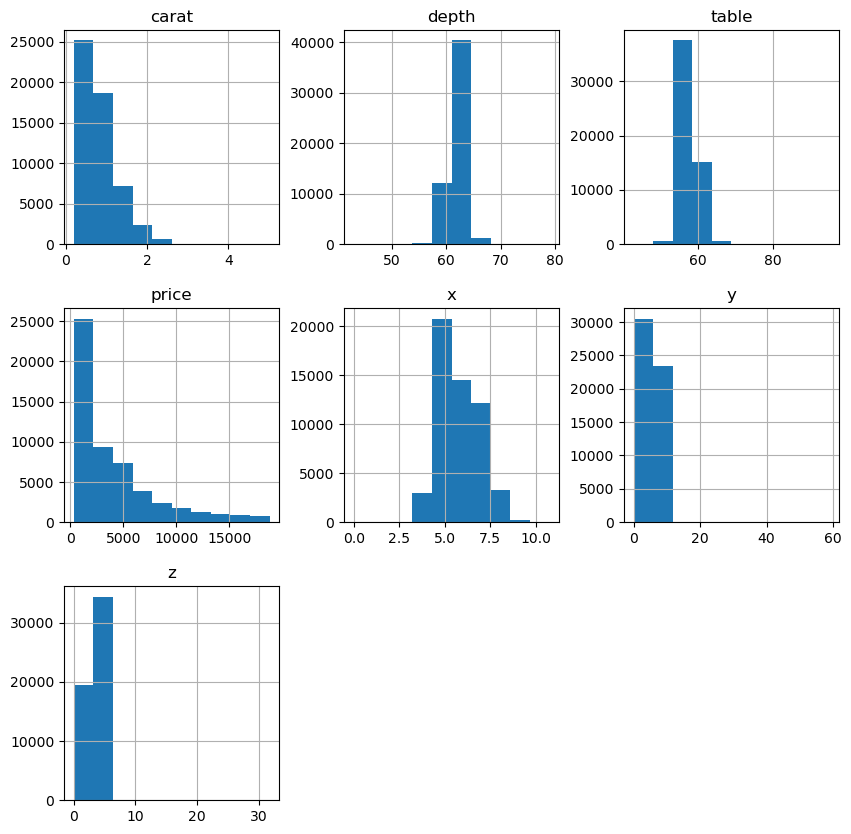

In [30]:
diamonds.hist(figsize = [10,10])

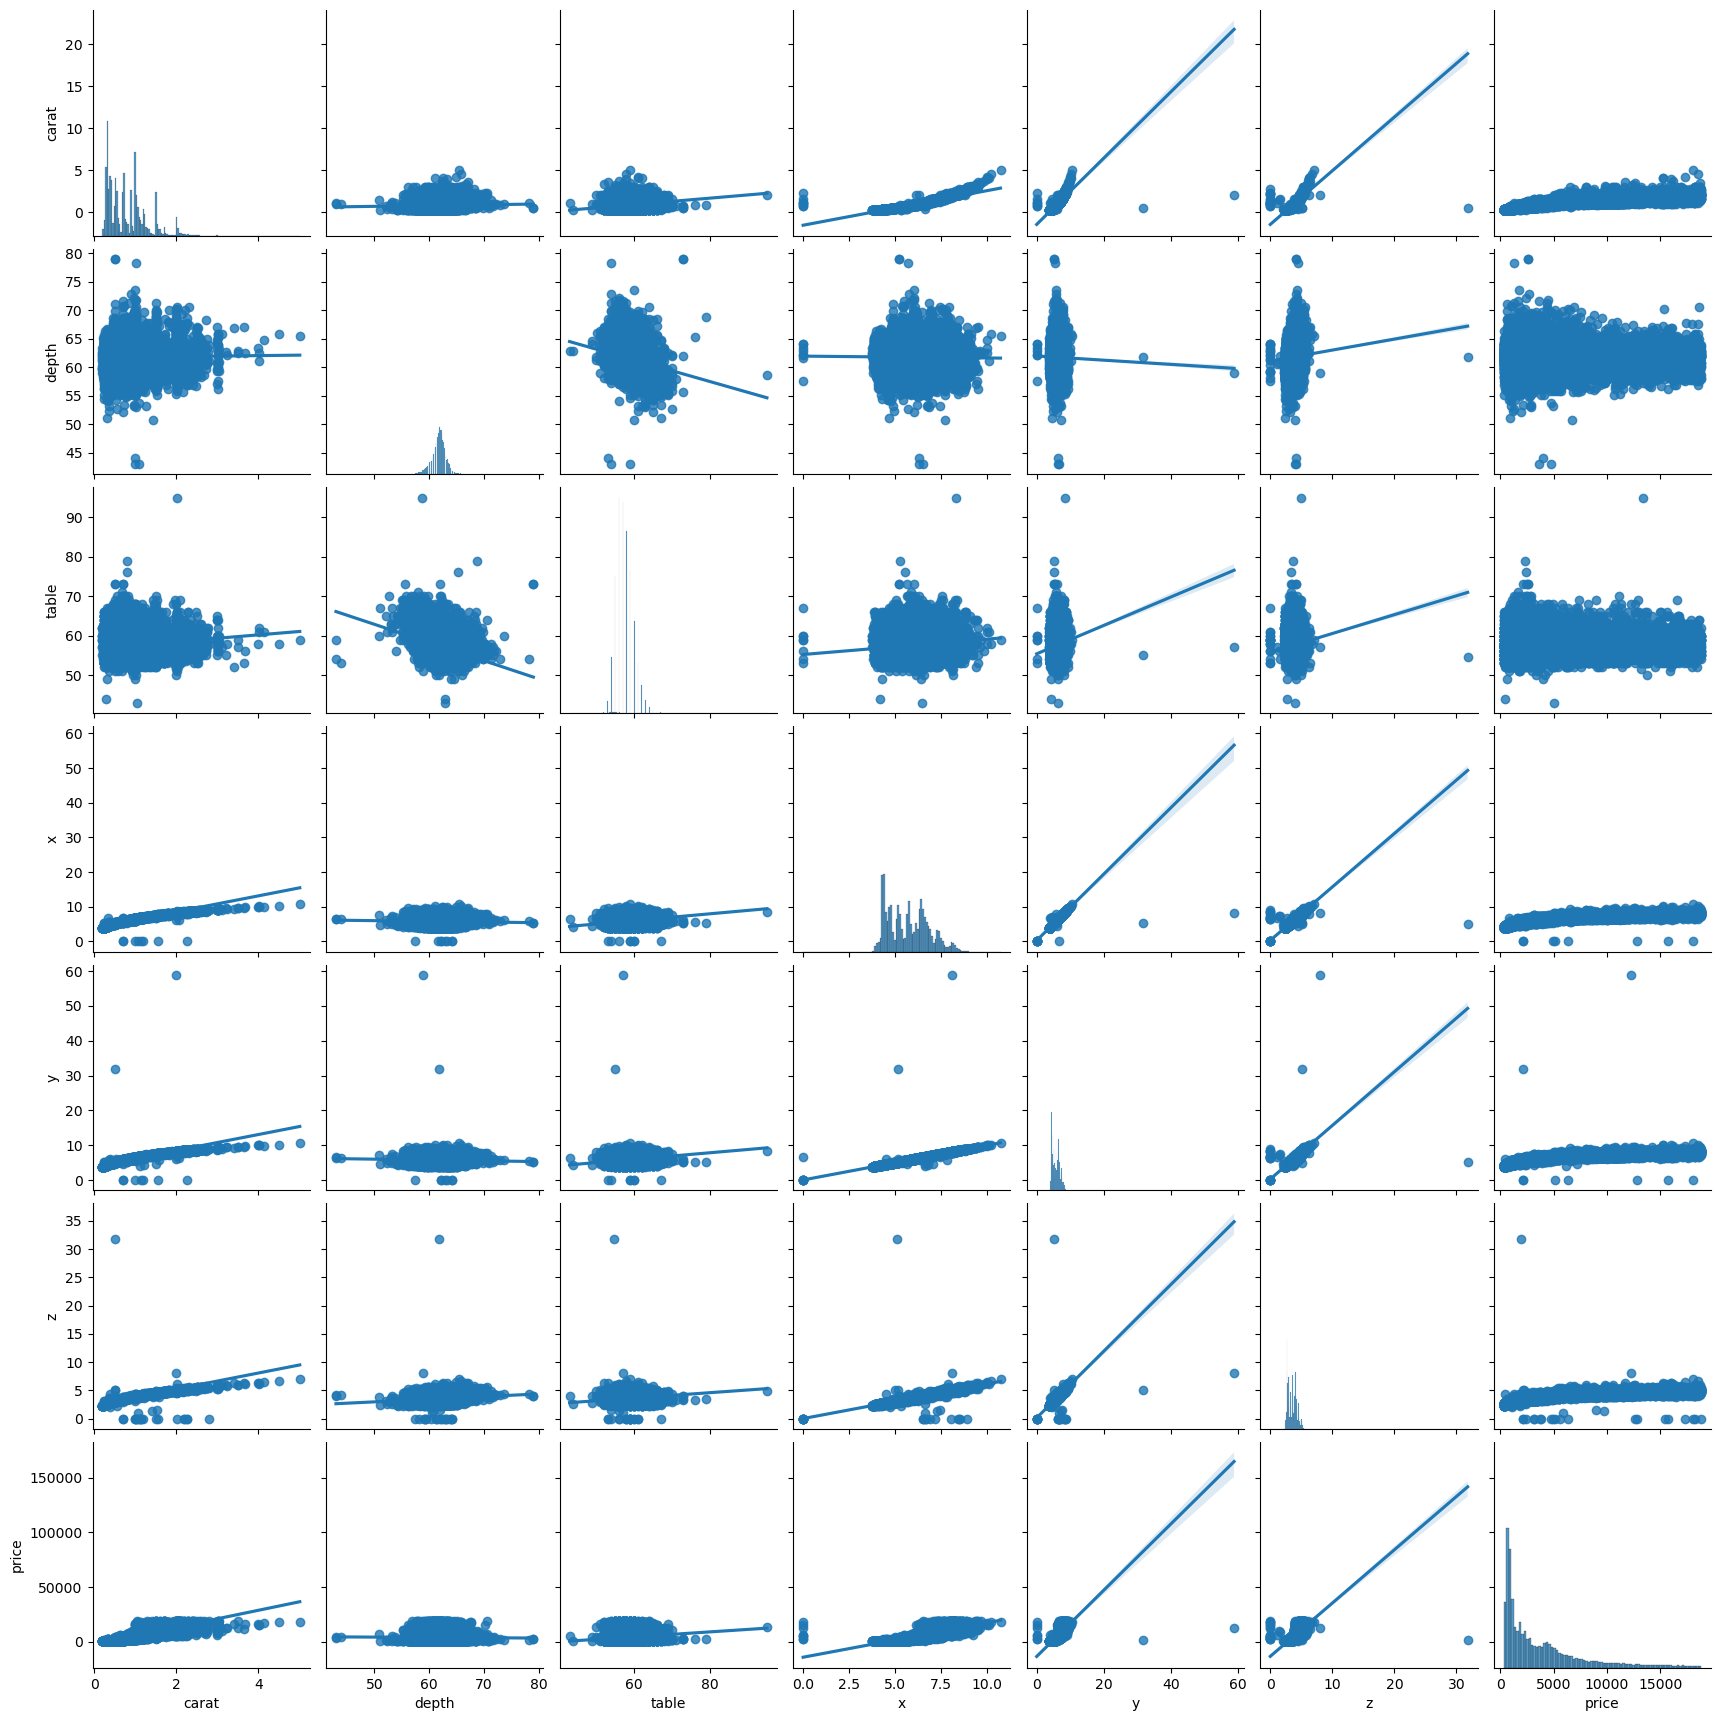

In [31]:
#Creating regression pairplot
sns.pairplot(data = diamonds, vars= ['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], kind='reg')

<Axes: >

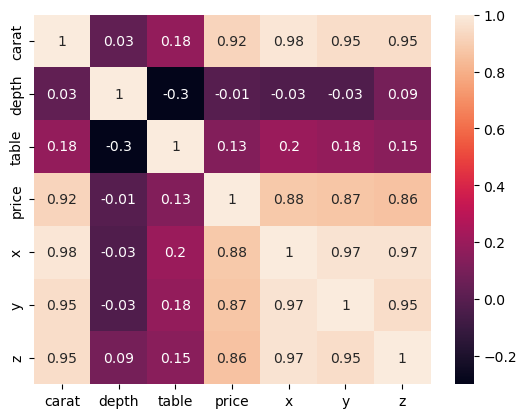

In [32]:
#Creating heatmap to see correlation between variables
correlation_matrix = diamonds.corr(numeric_only = True).round(2)
sns.heatmap(data=correlation_matrix, annot=True)

### Answers
1. I would use this dataset to predict the price of the diamond. All of the other variables are physical characteristics of the diamond. The features that are continuous variables (carat, depth, table, x, y, z) could be used in a regression model.
2. Based on the pairplot and heatmap, 'table' and 'depth' would be poor predictors.
3. The heatmap shows that 'carat' has the greatest correlation with the target variable('price').
4. The heatmap also shows that 'carat' is highly correlated with 'x', 'y' and 'z' -- this indicates that including these other variables in the linear regression is redundant.

In [33]:
#Defining feature and target variables
x = diamonds['carat'].values.reshape(-1, 1)
y = diamonds['price'].values.reshape(-1, 1)

In [34]:
#Splitting into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

In [35]:
#Defining the model
lin_reg = LinearRegression()
#Fitting training data to model
lin_reg.fit(x_train, y_train)
#Getting predictions
y_predict = lin_reg.predict(x_test)

In [36]:
#Checking performance of the model on testing data
rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))
r2 = r2_score(y_test, y_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 1535.5344941113888
R2 score is 0.8482566296393821


### Answers
1. This linear regression model has a low R2 score, indicating it is has poor accuracy. I could improve it by removing outliers.

In [37]:
#Normalizing price per carat; creating z-scores
price_norm_by_carat = diamonds.loc[:,'price'].values/diamonds.loc[:,'carat'].values
z_scores_price = st.zscore(price_norm_by_carat)

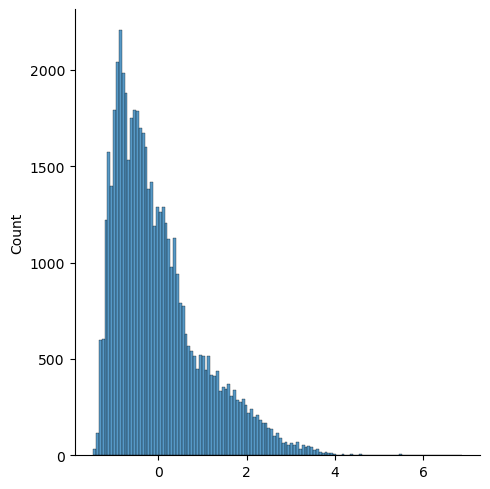

In [38]:
sns.displot(data=z_scores_price, kind = 'hist')

In [39]:
#Filtering outliers with z-score > 2
diamonds_filtered = diamonds.loc[z_scores_price <= 2]

In [40]:
diamonds_filtered.shape

(51111, 10)

In [41]:
#Running linear regression model again with filtered data
x_filtered = diamonds_filtered['carat'].values.reshape(-1, 1)
y_filtered = diamonds_filtered['price'].values.reshape(-1, 1)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_filtered, y_filtered, test_size = 0.2, random_state=1)
lin_reg = LinearRegression()
lin_reg.fit(x_train_2, y_train_2)
y_predict_2 = lin_reg.predict(x_test_2)

In [42]:
#Checking metrics of new linear regression model
rmse_filtered = (np.sqrt(mean_squared_error(y_test_2, y_predict_2)))
r2_filtered = r2_score(y_test_2, y_predict_2)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_filtered))
print('R2 score is {}'.format(r2_filtered))

The model performance for testing set
--------------------------------------
RMSE is 1027.349402016771
R2 score is 0.8983826306676568


### Answers
1. The r2 score greatly improved with filtering out the outliers in this dataset. 

# NOTEBOOK END